# Predicting Electric Vehicle Base MSRP Using Supervised Regression

* The aim of this project is to develop a supervised regression model to predict the Base MSRP (Manufacturer’s Suggested Retail Price) of electric vehicles (EVs) based on key technical and categorical features.

* By analyzing historical data, we aim to uncover how factors like electric range, battery capacity, and model year influence EV pricing.

* These insights can support better decision-making for: 
(i) EV Manufacturers – Optimizing pricing strategies 
(ii) Policymakers – Evaluating and refining EV incentive programs 
(iii) Consumers & Market Analysts – Understanding value, trends, and competitiveness

## 1.Data Collection
### 1.1 Importing necessary libraries

In [50]:
# to deactivate warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [52]:
# Load dataset
data = pd.read_csv(r"C:\Users\aksha\Downloads\Electric_Vehicle_Population_Data (1).csv")

In [53]:
df = pd.DataFrame(data)

In [54]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,98004.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,98597.0,2025,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


## 2.Data Preprocessing

 ### 2.1 Data Cleaning

In [55]:
print("Shape of the dataset is: ")
df.shape

Shape of the dataset is: 


(246137, 17)

In [56]:
print("Columns: ")
df.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [57]:
print("Dataset Information:")
print("\t")
df.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              

In [58]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,246133.000000,246137.000000,246120.000000,246120.000000,245597.000000,2.461370e+05,2.461330e+05
mean,98179.658481,2021.535698,44.872192,746.606188,28.871831,2.374324e+08,5.297685e+10
std,2494.101983,2.999144,82.913952,6987.233456,14.895938,6.719158e+07,1.580103e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.083391e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.548460e+08,5.303303e+10
75%,98375.000000,2024.000000,37.000000,0.000000,42.000000,2.717319e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


### 2.2 Finding missing values

In [59]:
missing_values = df.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [60]:
print("Unique Values: ")
print("\t")
df.nunique()


Unique Values: 
	


VIN (1-10)                                            14503
County                                                  217
City                                                    803
State                                                    48
Postal Code                                             993
Model Year                                               21
Make                                                     46
Model                                                   174
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          110
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       246137
Vehicle Location                                        992
Electric Utility                                         76
2020 Census Tract                       

### 2.3 Handling missing values

In [61]:
# filling null values of numeric features

num_col = df.select_dtypes(include=['number']).columns
df[num_col] = df[num_col].fillna(df[num_col].mean())

In [62]:
# filling null values of non-numeric features

non_num_col = df.select_dtypes(include=['object']).columns
df[non_num_col] = df[non_num_col].fillna("Missing")

In [63]:
# Checking for the null values after imputation
missing_values = df.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values)

Missing Values after Imputation:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### 2.4 Checking for duplicates

In [64]:
print("\t")
print(f"Total number of duplicate values is : {df.duplicated().sum()}")

	
Total number of duplicate values is : 0


### 2.5 Visualizing Outliers

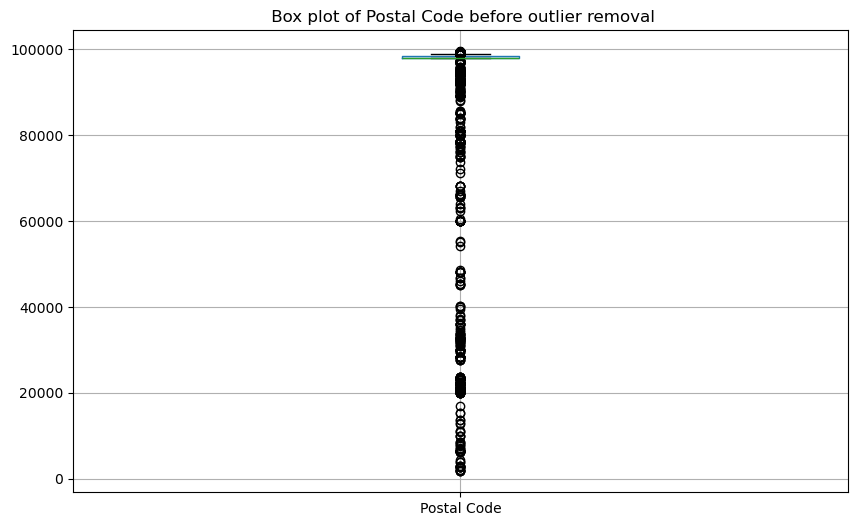

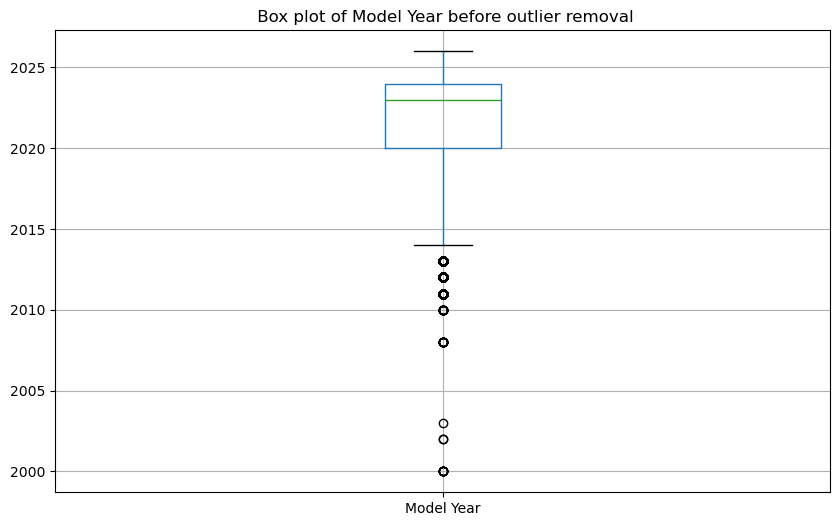

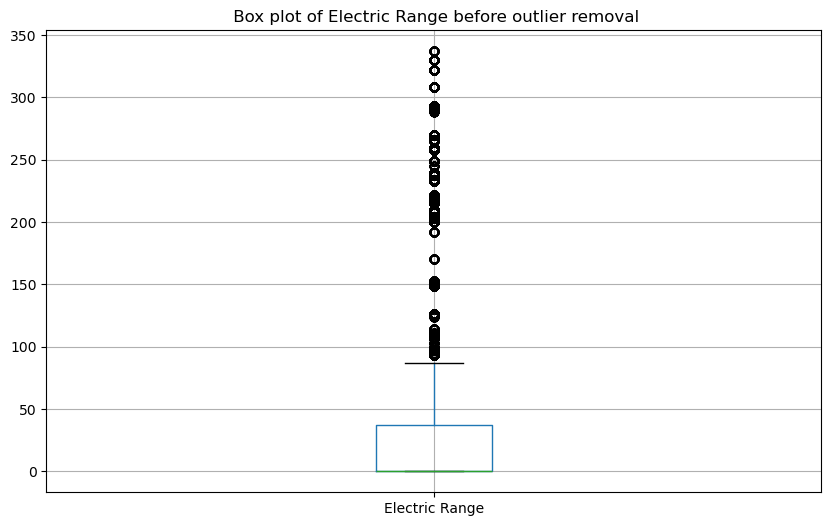

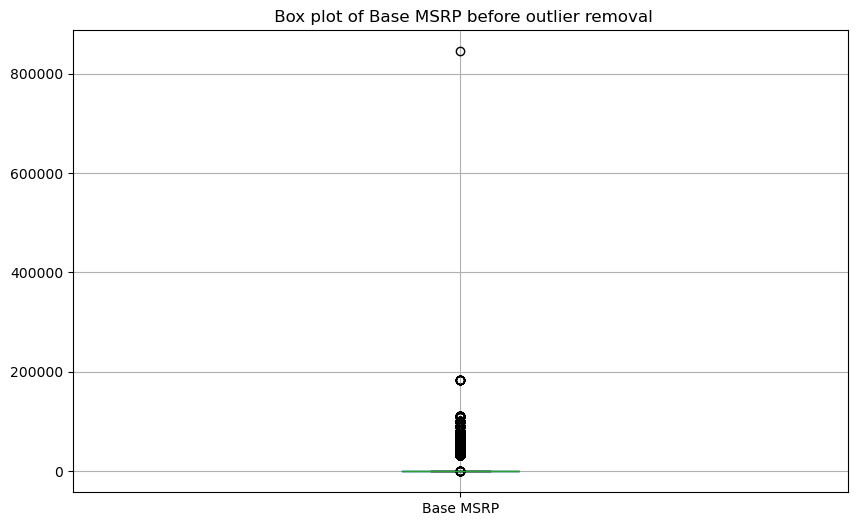

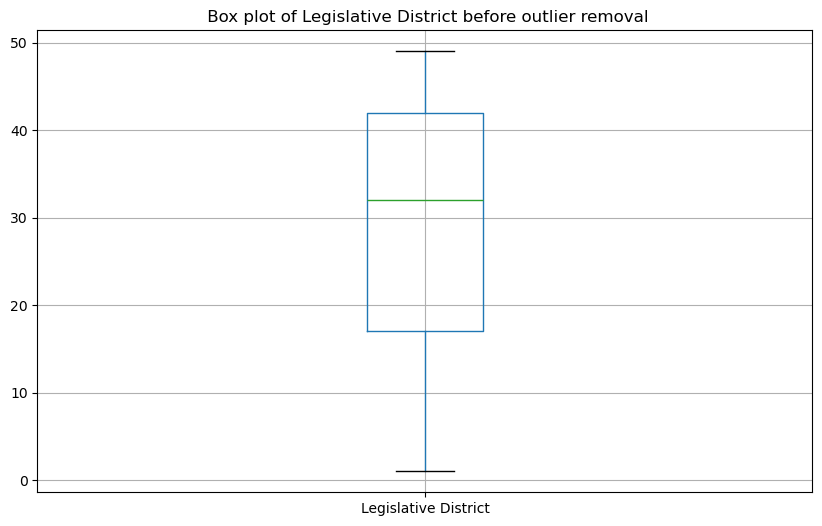

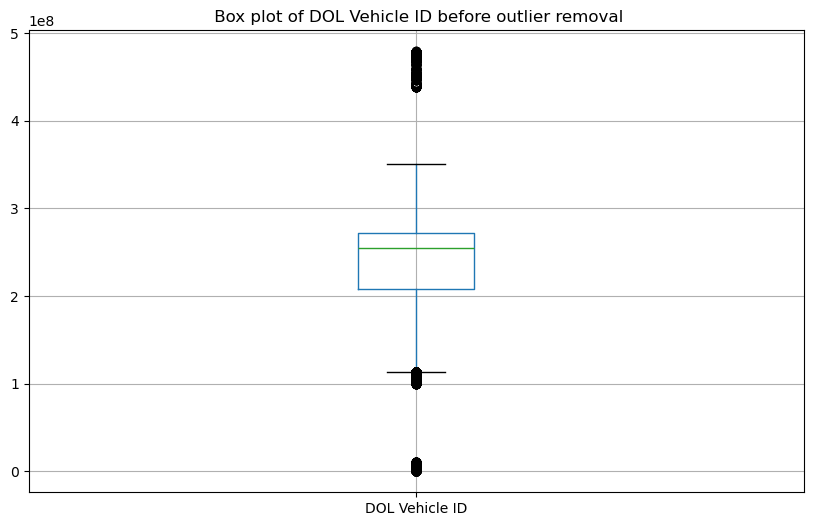

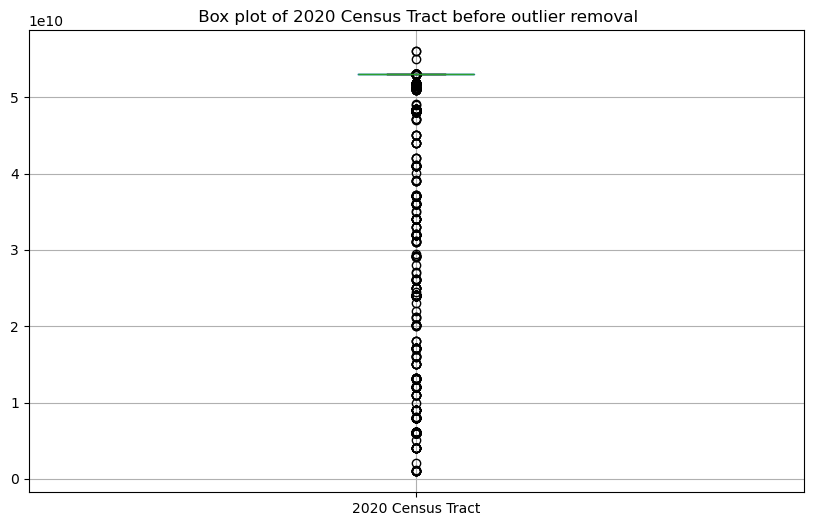

In [65]:
# Visualizing Outliers before outlier removal

num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} before outlier removal")
    plt.show()

The dataset contains significant outliers in certain features, which may skew the model's performance and lead to biased predictions. 

To ensure robust and accurate modeling, applying IQR method.

### 2.6 Handling Outliers

In [66]:
# Outlier removal

def handle_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5* IQR
        upper = Q3 + 1.5* IQR
        df[col] = df[col].clip(lower,upper)
    return df

In [67]:
columns = df.select_dtypes(include=['number']).columns
columns = columns.drop('Base MSRP')
columns
df = handle_outlier(df,columns)

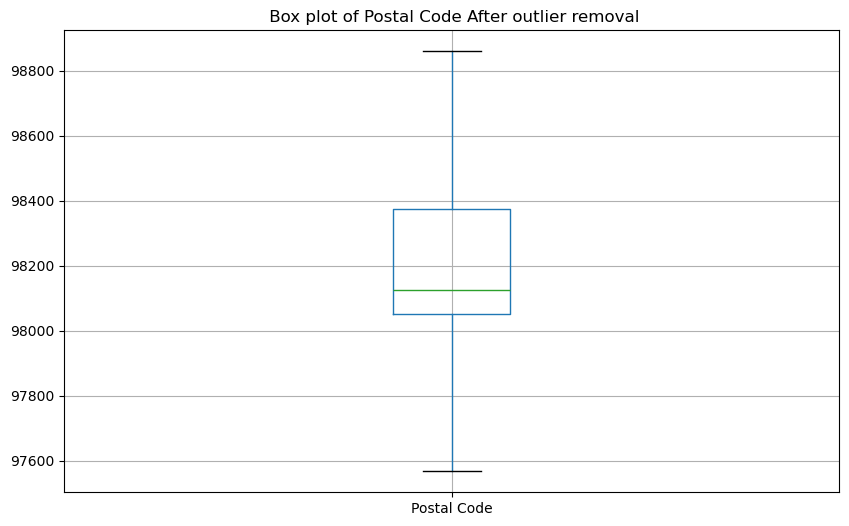

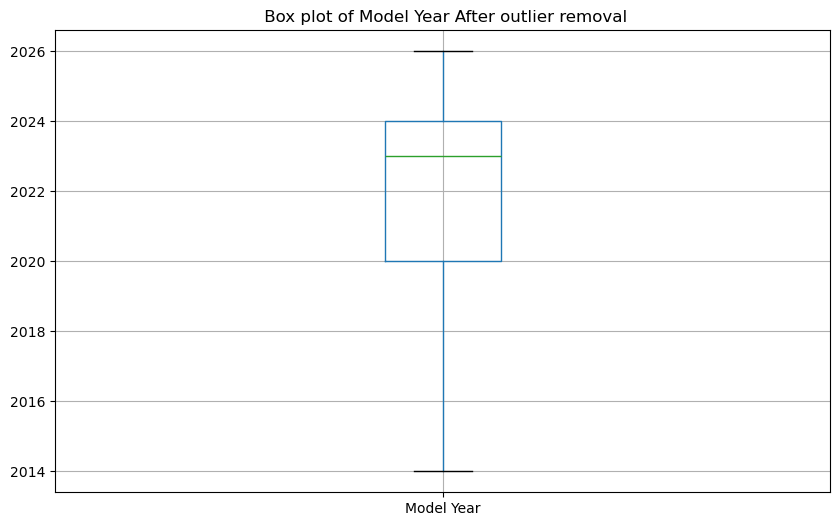

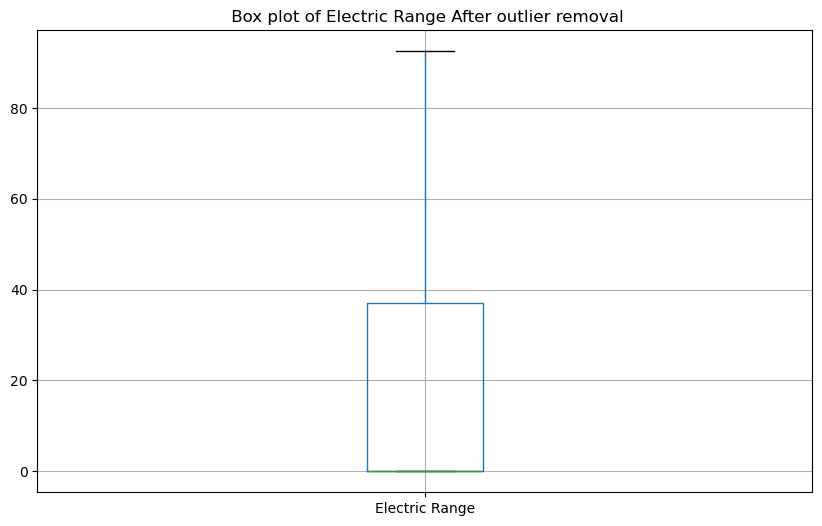

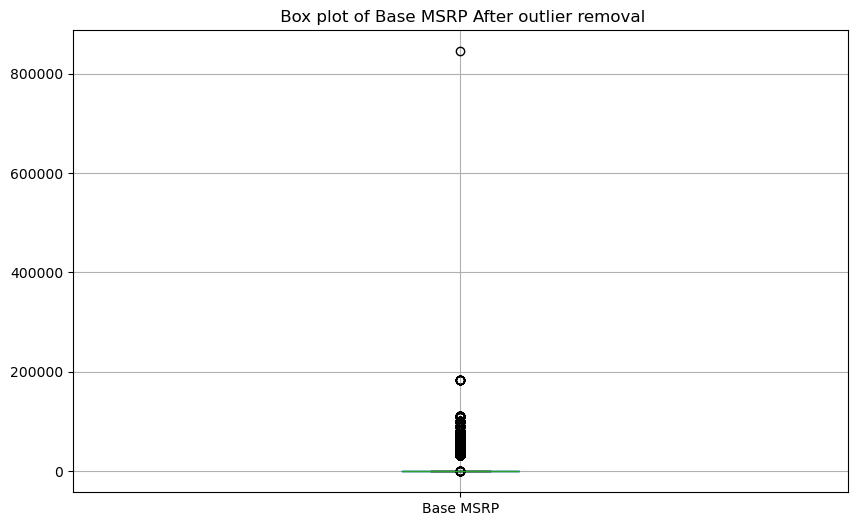

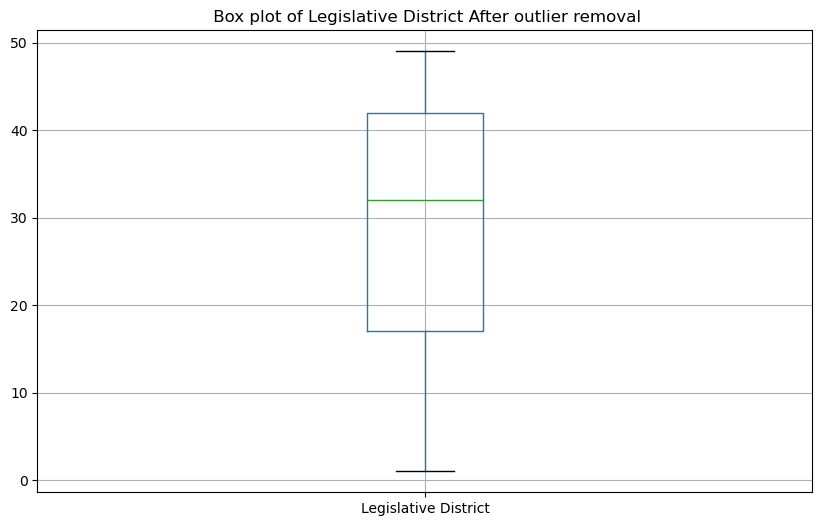

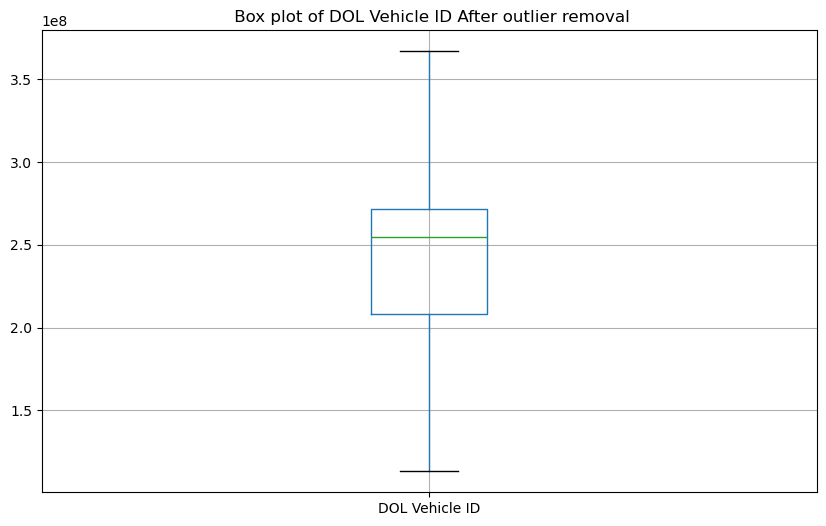

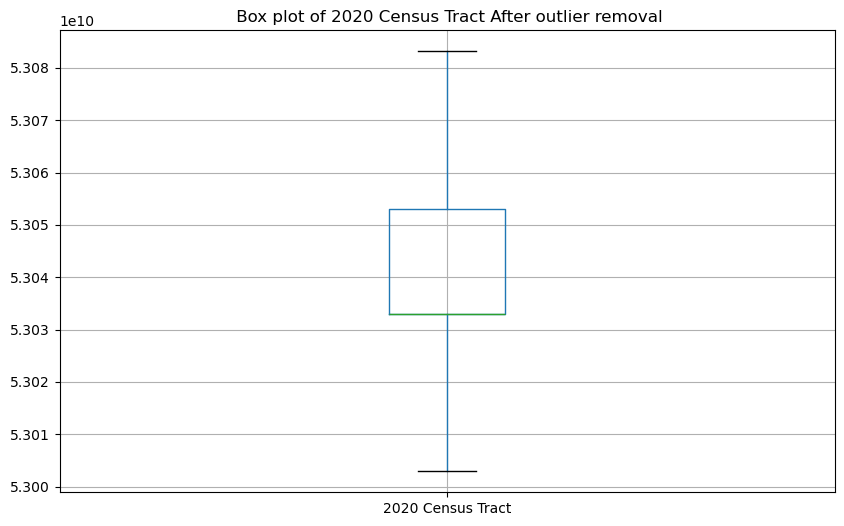

In [68]:
num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} After outlier removal")
    plt.show()

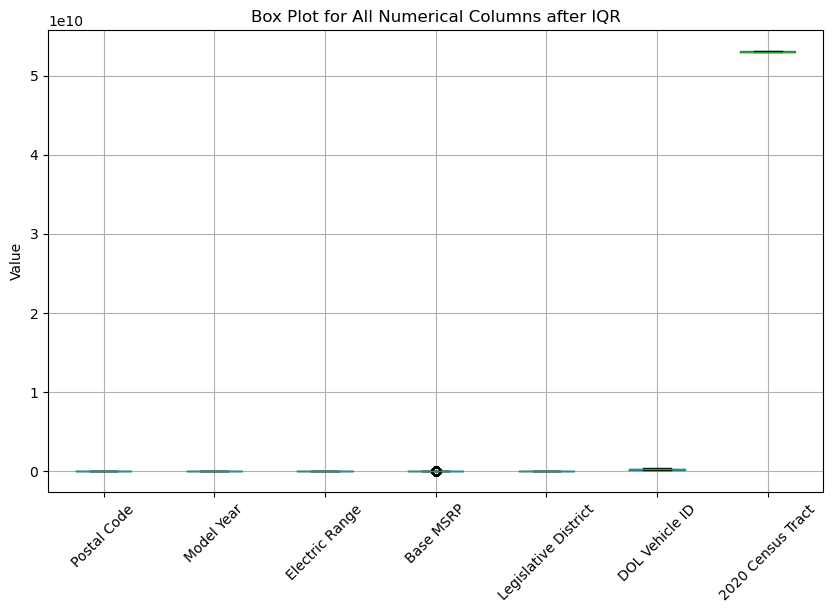

In [69]:
# Select numerical columns
columns = df.select_dtypes(include=['int64', 'float64'])

# Create a single box plot for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
columns.boxplot()
plt.title("Box Plot for All Numerical Columns after IQR")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if necessary
plt.show()

### 2.7 Addressing Skewness

In [71]:
# Checking skewness
skewness = df.select_dtypes(include=['number']).skew()
skewness

Postal Code              1.076459
Model Year              -1.105118
Electric Range           1.159114
Base MSRP               16.320237
Legislative District    -0.430293
DOL Vehicle ID          -0.546363
2020 Census Tract        0.217403
dtype: float64

In [73]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print("Skewed Features are :\n", skewness[skewed_feature])

Skewed Features are :
 Postal Code        1.076459
Model Year        -1.105118
Electric Range     1.159114
Base MSRP         16.320237
DOL Vehicle ID    -0.546363
dtype: float64


In [74]:
# Applying Log Transformation for the column Base MSRP 
df['Base MSRP'] = np.log1p(df['Base MSRP'])
skewness = df.select_dtypes(include=['number']).skew()
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.076459
Model Year       -1.105118
Electric Range    1.159114
Base MSRP         8.548155
DOL Vehicle ID   -0.546363
dtype: float64


In [75]:
df['Model Year'] = df['Model Year'].max() - df['Model Year'] + 1
df['Model Year'] = np.log1p(df['Model Year'])

In [76]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.076459
Model Year       -1.105118
Electric Range    1.159114
Base MSRP         8.548155
DOL Vehicle ID   -0.546363
dtype: float64


In [77]:
# Applying PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[skewed_feature] = pt.fit_transform(df[skewed_feature])

In [78]:
print("Skewness after applying yeo-johnson: ")
df.select_dtypes(include=['number']).skew()

Skewness after applying yeo-johnson: 


Postal Code             0.000000
Model Year              0.008380
Electric Range          0.440233
Base MSRP               8.527921
Legislative District   -0.430293
DOL Vehicle ID          0.000904
2020 Census Tract       0.217403
dtype: float64

In [79]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,WA,-4.440892e-16,1.041611,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.371466,-0.115693,37.0,-2.016680,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,WA,3.774758e-15,0.507282,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,15.0,-0.325489,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,3.774758e-15,0.148730,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,15.0,-0.973339,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,-1.554312e-15,0.148730,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.812650,-0.115693,41.0,-0.413142,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,2.220446e-15,-1.863018,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,1.057747,-0.115693,2.0,0.755937,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


### 2.8 Label encoding


In [80]:
X_train = df.drop(['VIN (1-10)', 'Base MSRP'], axis=1)
y_train = df['Base MSRP']

In [81]:
cat_col = X_train.select_dtypes(include = ['object'])
le = LabelEncoder()
for col in cat_col.columns:
    X_train[col] = le.fit_transform(X_train[col])

### 2.9 Exploratory Data Analysis (EDA)

In [82]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [83]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,0.037487,0.067075,-0.001317,-0.395555,0.005666,0.034553
Model Year,0.037487,1.000000,0.595444,0.176408,0.010631,-0.377408,0.005687
Electric Range,0.067075,0.595444,1.000000,0.138528,-0.019071,-0.143857,-0.005613
Base MSRP,-0.001317,0.176408,0.138528,1.000000,0.008505,-0.044817,0.001179
Legislative District,-0.395555,0.010631,-0.019071,0.008505,1.000000,-0.007737,-0.099813
DOL Vehicle ID,0.005666,-0.377408,-0.143857,-0.044817,-0.007737,1.000000,-0.004498
2020 Census Tract,0.034553,0.005687,-0.005613,0.001179,-0.099813,-0.004498,1.000000


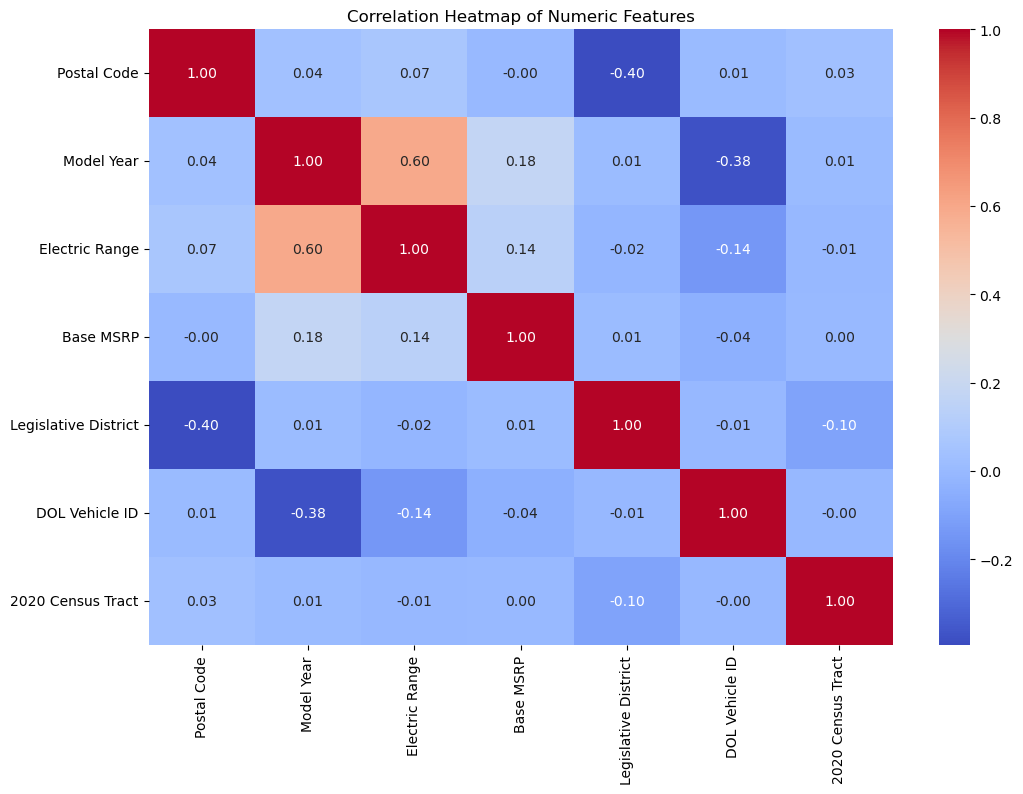

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The heatmap shows a clear pattern of high correlation between some features, such as:
* Base MSRP and Electric Range
* Model Year and Base MSRP

Some features have low correlation with others, such as:
* Postal Code and most other features

There are some clusters of highly correlated features, such as:
* Base MSRP, Electric Range, and Model Year


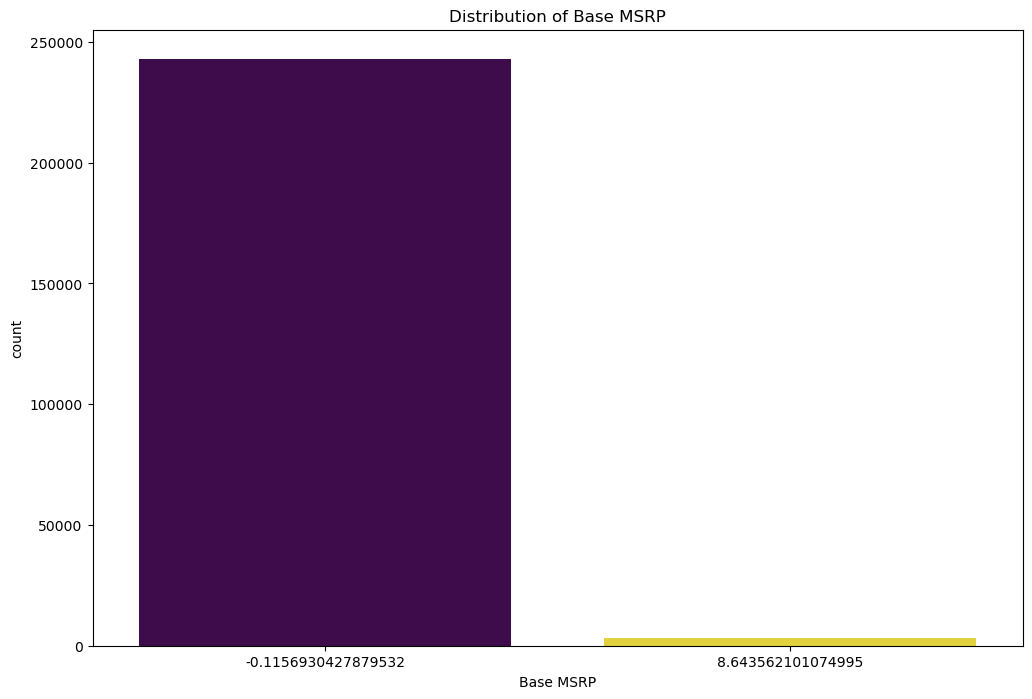

In [85]:
# Count Plot of Base MSRP
plt.figure(figsize=(12,8))
sns.countplot(x ='Base MSRP', data=df,  hue='Base MSRP', legend=False, palette='viridis')
plt.title("Distribution of Base MSRP")
plt.show()

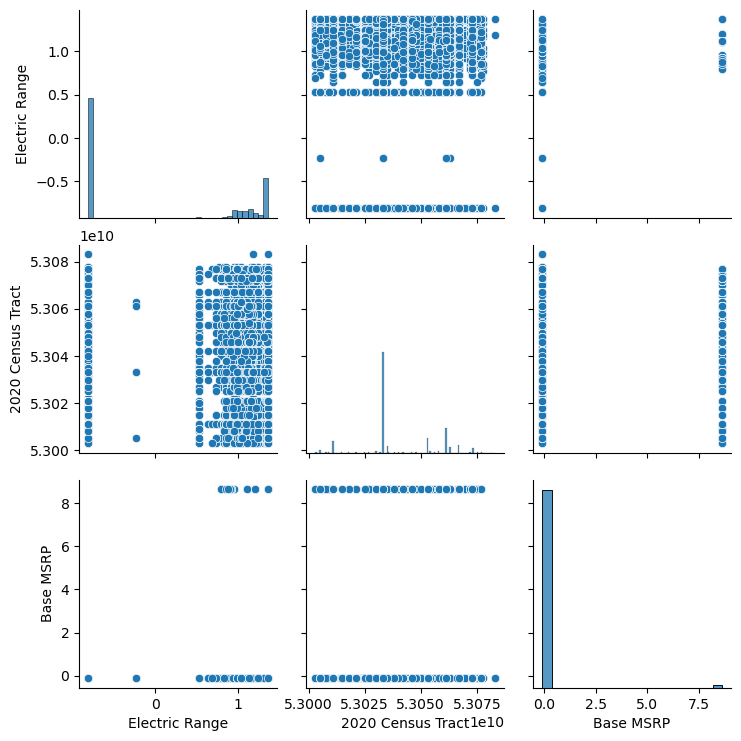

In [35]:
# Pair plot for selected features
sns.pairplot(df[['Electric Range', '2020 Census Tract', 'Base MSRP']])
plt.show()

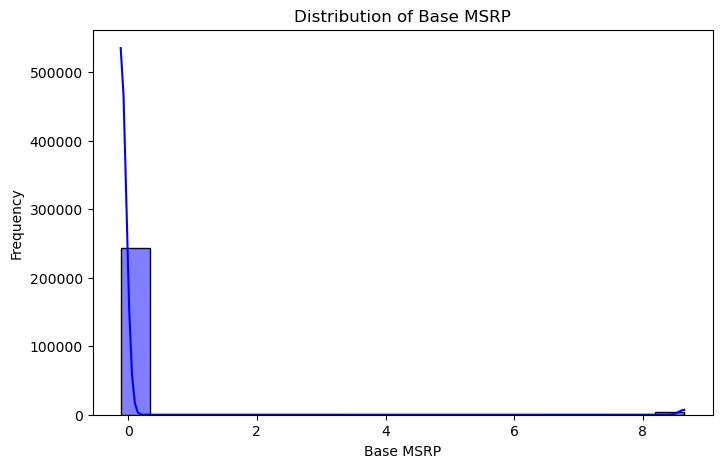

In [86]:
# Distribution of the Target Variable 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], kde=True, color='blue')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Frequency")
plt.show()

### 2.10 Feature Selection

In [87]:
selector = SelectKBest(score_func = f_regression, k=10)
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
feature = X_train.columns
score = selector.scores_

feature_score = pd.DataFrame({
    'Feature' : feature,
    'Score' : score
}).sort_values(by = 'Score' , ascending = False)
selected_feature = selected_features.to_list()
print("Feature scores")
feature_score

Feature scores


,Feature,Score
4,Model Year,7905.720310
9,Electric Range,4815.712265
7,Electric Vehicle Type,597.711448
11,DOL Vehicle ID,495.362521
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,160.691534
10,Legislative District,17.805864
1,City,4.940296
6,Model,3.884672
12,Vehicle Location,1.361810
2,State,1.008418


In [88]:
print("Selected Features")
selected_feature

Selected Features


['City',
 'State',
 'Model Year',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location']

In [89]:
X_train = X_train[selected_feature]

### 2.11 Feature Scaling

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### 2.12 Splitting the data into training and testing sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)

## 3. Build the ML Model:

In [92]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor()
}

### 3.1 Model Evaluation:

In [ ]:
result = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    result[model_name] = {
    "R2 Score" : r2,
    "MSE" : mse,
    "MAE" : mae,
    "RMSE" : rmse}
result = pd.DataFrame(result).T
print(result)

In [49]:
# Finding The Best Model
best_model = result['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(result.loc[best_model])

The best Model based on R2 Score is:
 3. Random Forest Regressor
R2 Score    0.990046
MSE         0.009921
MAE         0.002482
RMSE        0.099604
Name: 3. Random Forest Regressor, dtype: float64


# Conclusion: 
The best-performing model based on the R2 Score is the Random Forest Regressor with
 
* R2 Score    0.990046

* MSE         0.009921

* MAE         0.002482

* RMSE        0.099604